In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

1. Perform Detailed exploratory analysis\
a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total 
products, Total categories, Total sellers, Total locations, Total channels, Total 
payment methods etc…) 

In [2]:
customers = pd.read_csv('CUSTOMERS.csv')
sellers = pd.read_csv('SELLERS.csv')
products = pd.read_csv('PRODUCTS.csv')
orders = pd.read_csv('ORDERS.csv')
order_items = pd.read_csv('ORDER_ITEMS.csv')
order_payments = pd.read_csv('ORDER_PAYMENTS.csv')
order_reviews = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
geo_location = pd.read_csv('GEO_LOCATION.csv')


In [3]:
print(customers.head())
print(sellers.head())
print(products.head())
print(orders.head())
print(order_items.head())
print(order_payments.head())
print(order_reviews.head())
print(geo_location.head())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix customer_city  customer_state  
0                     14409      Adilabad  Andhra Pradesh  
1                      9790         Adoni  Andhra Pradesh  
2                      1151  Akkarampalle  Andhra Pradesh  
3                      8775   Akkayapalle  Andhra Pradesh  
4                     13056         Alwal  Andhra Pradesh  
                          seller_id  seller_zip_code_prefix   seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023         Alwal   
1  d1b65fc7debc3361ea86b5f14c68d2e2            

In [4]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [5]:
total_revenue = order_items['price'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')

Total Revenue: $13,591,643.70


total_quantity = products['product_photos_qty'].sum()
print(f'Total Quantity: {total_quantity}')

In [6]:
total_quantity = order_items['order_item_id'].sum()
print(f'Total Quantity: {total_quantity}')

Total Quantity: 134936


In [7]:
total_categories = products['product_category_name'].nunique()
print(f'Total Categories: {total_categories}')

Total Categories: 71


In [8]:
total_sellers = sellers['seller_id'].nunique()
print(f'Total Sellers: {total_sellers}')

Total Sellers: 3095


In [9]:
total_locations = geo_location['geolocation_zip_code_prefix'].nunique()
print(f'Total Locations: {total_locations}')

Total Locations: 19015


In [10]:
total_channels = orders['order_status'].nunique()
print(f'Total Channels: {total_channels}')

Total Channels: 8


In [11]:
total_payment_methods = order_payments['payment_type'].nunique()
print(f'Total Payment Methods: {total_payment_methods}')

Total Payment Methods: 5


In [12]:
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Quantity: {total_quantity}")
print(f"Total Categories: {total_categories}")
print(f"Total Sellers: {total_sellers}")
print(f"Total Locations: {total_locations}")
print(f"Total Channels: {total_channels}")
print(f"Total Payment Methods: {total_payment_methods}")

Total Revenue: $13,591,643.70
Total Quantity: 134936
Total Categories: 71
Total Sellers: 3095
Total Locations: 19015
Total Channels: 8
Total Payment Methods: 5


b. Understanding how many new customers acquired every month

In [13]:
orders_customers = pd.merge(orders, customers, on='customer_id')
orders_customers['order_purchase_timestamp'] = pd.to_datetime(orders_customers['order_purchase_timestamp'])
first_purchase = orders_customers.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_date']

first_purchase['first_purchase_month'] = first_purchase['first_purchase_date'].dt.to_period('M')

new_customers_per_month = first_purchase.groupby('first_purchase_month')['customer_id'].nunique().reset_index()
new_customers_per_month.columns = ['first_purchase_month', 'new_customers']

new_customers_per_month

,first_purchase_month,new_customers
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


c. Understand the retention of customers on month on month basis

In [14]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders_customers = pd.merge(orders, customers, on='customer_id')
orders_customers['purchase_month'] = orders_customers['order_purchase_timestamp'].dt.to_period('M')

first_purchase = orders_customers.groupby('customer_id')['purchase_month'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_month']
orders_customers = pd.merge(orders_customers, first_purchase, on='customer_id')

retention_matrix = pd.crosstab(orders_customers['first_purchase_month'], orders_customers['purchase_month'])
retention_matrix_percentage = retention_matrix.divide(retention_matrix.sum(axis=1), axis=0)

print("Retention Matrix (Counts):")
print(retention_matrix)

print("\nRetention Matrix (Percentages):")
print(retention_matrix_percentage)


Retention Matrix (Counts):
purchase_month        2016-09  2016-10  2016-12  2017-01  2017-02  2017-03  \
first_purchase_month                                                         
2016-09                     4        0        0        0        0        0   
2016-10                     0      324        0        0        0        0   
2016-12                     0        0        1        0        0        0   
2017-01                     0        0        0      800        0        0   
2017-02                     0        0        0        0     1780        0   
2017-03                     0        0        0        0        0     2682   
2017-04                     0        0        0        0        0        0   
2017-05                     0        0        0        0        0        0   
2017-06                     0        0        0        0        0        0   
2017-07                     0        0        0        0        0        0   
2017-08                     0        

d. How the revenues from existing/new customers on month on month basis

In [15]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders_customers = pd.merge(orders, customers, on='customer_id')
orders_customers_items = pd.merge(orders_customers, order_items, on='order_id')
orders_customers_items['purchase_month'] = orders_customers_items['order_purchase_timestamp'].dt.to_period('M')

first_purchase = orders_customers_items.groupby('customer_id')['purchase_month'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_month']

orders_customers_items = pd.merge(orders_customers_items, first_purchase, on='customer_id')
orders_customers_items['customer_type'] = orders_customers_items.apply(
    lambda row: 'New' if row['purchase_month'] == row['first_purchase_month'] else 'Existing', axis=1)

monthly_revenue = orders_customers_items.groupby(['purchase_month', 'customer_type'])['price'].sum().reset_index()

monthly_revenue_pivot = monthly_revenue.pivot(index='purchase_month', columns='customer_type', values='price').fillna(0)

print("Monthly Revenue from New and Existing Customers:")

monthly_revenue_pivot

Monthly Revenue from New and Existing Customers:


customer_type,New
purchase_month,
2016-09,267.36
2016-10,49507.66
2016-12,10.90
2017-01,120312.87
2017-02,247303.02
2017-03,374344.30
2017-04,359927.23
2017-05,506071.14
2017-06,433038.60


e. Understand the trends/seasonality of sales, quantity by category, location, month, 
week, day, time, channel, payment method etc…


In [16]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders_customers = pd.merge(orders, customers, on='customer_id')
orders_items = pd.merge(orders_customers, order_items, on='order_id')
orders_items_products = pd.merge(orders_items, products, on='product_id')
orders_items_products_sellers = pd.merge(orders_items_products, sellers, on='seller_id')
orders_items_products_sellers_payments = pd.merge(orders_items_products_sellers, order_payments, on='order_id')

orders_items_products_sellers_payments.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350,Chhuikhadan,Chhattisgarh,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350,Chhuikhadan,Chhattisgarh,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,9350,Chhuikhadan,Chhattisgarh,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,8/15/2017 20:05,8/17/2017 15:28,8/18/2017 14:44,8/28/2017 0:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,19.0,8.0,13.0,9350,Chhuikhadan,Chhattisgarh,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,8/2/2017 18:43,8/4/2017 17:35,8/7/2017 18:30,8/15/2017 0:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,19.0,8.0,13.0,9350,Chhuikhadan,Chhattisgarh,1,credit_card,1,37.77


In [17]:
orders_items_products_sellers_payments['purchase_month'] = orders_items_products_sellers_payments['order_purchase_timestamp'].dt.to_period('M')
orders_items_products_sellers_payments['purchase_week'] = orders_items_products_sellers_payments['order_purchase_timestamp'].dt.to_period('W')
orders_items_products_sellers_payments['purchase_day'] = orders_items_products_sellers_payments['order_purchase_timestamp'].dt.to_period('D')
orders_items_products_sellers_payments['purchase_hour'] = orders_items_products_sellers_payments['order_purchase_timestamp'].dt.hour

orders_items_products_sellers_payments['purchase_dayofweek'] = orders_items_products_sellers_payments['order_purchase_timestamp'].dt.dayofweek

orders_items_products_sellers_payments['payment_type'] = orders_items_products_sellers_payments['payment_type'].fillna('unknown')

orders_items_products_sellers_payments.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,purchase_month,purchase_week,purchase_day,purchase_hour,purchase_dayofweek
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,Chhattisgarh,1,credit_card,1,18.12,2017-10,2017-10-02/2017-10-08,2017-10-02,10,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,Chhattisgarh,3,voucher,1,2.00,2017-10,2017-10-02/2017-10-08,2017-10-02,10,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,Chhattisgarh,2,voucher,1,18.59,2017-10,2017-10-02/2017-10-08,2017-10-02,10,0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,8/15/2017 20:05,8/17/2017 15:28,8/18/2017 14:44,8/28/2017 0:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,Chhattisgarh,1,credit_card,3,37.77,2017-08,2017-08-14/2017-08-20,2017-08-15,18,1
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,8/2/2017 18:43,8/4/2017 17:35,8/7/2017 18:30,8/15/2017 0:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,Chhattisgarh,1,credit_card,1,37.77,2017-08,2017-07-31/2017-08-06,2017-08-02,18,2


In [18]:
# Sales and quantity by product category
category_sales = orders_items_products_sellers_payments.groupby('product_category_name')['price'].sum().reset_index()
category_quantity = orders_items_products_sellers_payments.groupby('product_category_name')['order_item_id'].count().reset_index()

print("Category Sales:")
print(category_sales)

print("Category Quantity:")

category_quantity

Category Sales:
         product_category_name       price
0   Agro_Industry_And_Commerce    83841.95
1             Air_Conditioning    55962.38
2                          Art    24721.97
3        Arts_And_Craftmanship     1814.01
4                        Audio    52450.37
..                         ...         ...
66                  Stationery   239028.99
67      Tablets_Printing_Image     7840.31
68                   Telephony   339399.16
69                        Toys   500295.09
70               Watches_Gifts  1253143.30

[71 rows x 2 columns]
Category Quantity:


,product_category_name,order_item_id
0,Agro_Industry_And_Commerce,252
1,Air_Conditioning,302
2,Art,219
3,Arts_And_Craftmanship,24
4,Audio,380
...,...,...
66,Stationery,2617
67,Tablets_Printing_Image,87
68,Telephony,4721
69,Toys,4273


In [19]:
# Sales and quantity by location (assuming 'seller_city' as the location)
location_sales = orders_items_products_sellers_payments.groupby('seller_city')['price'].sum().reset_index()
location_quantity = orders_items_products_sellers_payments.groupby('seller_city')['order_item_id'].count().reset_index()

print("Location Sales:")
print(location_sales)

print("Location Quantity:")
print(location_quantity)


Location Sales:
      seller_city     price
0       Aadityana    161.70
1      Aarambhada   1270.75
2         Achabal     41.90
3          Adalaj   2489.30
4        Adilabad  91128.94
..            ...       ...
529      Yellandu    298.70
530    Yemmiganur  10790.85
531     Zahirabad  49512.15
532  Ziauddin Pur  25368.93
533          Ziro    346.60

[534 rows x 2 columns]
Location Quantity:
      seller_city  order_item_id
0       Aadityana              3
1      Aarambhada             26
2         Achabal              1
3          Adalaj             16
4        Adilabad            683
..            ...            ...
529      Yellandu              6
530    Yemmiganur             46
531     Zahirabad            411
532  Ziauddin Pur            242
533          Ziro             15

[534 rows x 2 columns]


In [20]:
# Sales and quantity by month
monthly_sales = orders_items_products_sellers_payments.groupby('purchase_month')['price'].sum().reset_index()
monthly_quantity = orders_items_products_sellers_payments.groupby('purchase_month')['order_item_id'].count().reset_index()

print("Monthly Sales:")
print(monthly_sales)

print("Monthly Quantity:")
print(monthly_quantity)


Monthly Sales:
   purchase_month       price
0         2016-09      132.39
1         2016-10    50942.23
2         2016-12       10.90
3         2017-01   128637.99
4         2017-02   260753.86
5         2017-03   396451.04
6         2017-04   391784.42
7         2017-05   545340.65
8         2017-06   453031.41
9         2017-07   533616.84
10        2017-08   601409.67
11        2017-09   662276.39
12        2017-10   693807.60
13        2017-11  1046127.84
14        2017-12   770656.15
15        2018-01   987151.41
16        2018-02   880099.79
17        2018-03  1025936.06
18        2018-04  1029472.30
19        2018-05  1032150.44
20        2018-06   909221.10
21        2018-07   925302.46
22        2018-08   884657.40
23        2018-09      145.00
Monthly Quantity:
   purchase_month  order_item_id
0         2016-09              3
1         2016-10            381
2         2016-12              1
3         2017-01           1005
4         2017-02           2062
5         2017-03  

In [21]:
# Sales and quantity by week
weekly_sales = orders_items_products_sellers_payments.groupby('purchase_week')['price'].sum().reset_index()
weekly_quantity = orders_items_products_sellers_payments.groupby('purchase_week')['order_item_id'].count().reset_index()

print("Weekly Sales:")
print(weekly_sales)

print("Weekly Quantity:")
print(weekly_quantity)

Weekly Sales:
            purchase_week      price
0   2016-08-29/2016-09-04      72.89
1   2016-09-05/2016-09-11      59.50
2   2016-09-26/2016-10-02     100.00
3   2016-10-03/2016-10-09   47096.86
4   2016-10-10/2016-10-16    3745.37
..                    ...        ...
89  2018-08-06/2018-08-12  288122.23
90  2018-08-13/2018-08-19  257414.84
91  2018-08-20/2018-08-26  128453.12
92  2018-08-27/2018-09-02   10722.21
93  2018-09-03/2018-09-09     145.00

[94 rows x 2 columns]
Weekly Quantity:
            purchase_week  order_item_id
0   2016-08-29/2016-09-04              2
1   2016-09-05/2016-09-11              1
2   2016-09-26/2016-10-02              1
3   2016-10-03/2016-10-09            337
4   2016-10-10/2016-10-16             43
..                    ...            ...
89  2018-08-06/2018-08-12           2323
90  2018-08-13/2018-08-19           2123
91  2018-08-20/2018-08-26           1213
92  2018-08-27/2018-09-02            136
93  2018-09-03/2018-09-09              1

[94 rows 

In [22]:
# Sales and quantity by day
daily_sales = orders_items_products_sellers_payments.groupby('purchase_day')['price'].sum().reset_index()
daily_quantity = orders_items_products_sellers_payments.groupby('purchase_day')['order_item_id'].count().reset_index()

print("Daily Sales:")
print(daily_sales)

print("Daily Quantity:")
print(daily_quantity)

Daily Sales:
    purchase_day     price
0     2016-09-04     72.89
1     2016-09-05     59.50
2     2016-10-02    100.00
3     2016-10-03    463.48
4     2016-10-04  10488.26
..           ...       ...
610   2018-08-26   8295.61
611   2018-08-27   5418.66
612   2018-08-28   3757.51
613   2018-08-29   1546.04
614   2018-09-03    145.00

[615 rows x 2 columns]
Daily Quantity:
    purchase_day  order_item_id
0     2016-09-04              2
1     2016-09-05              1
2     2016-10-02              1
3     2016-10-03              8
4     2016-10-04             76
..           ...            ...
610   2018-08-26             85
611   2018-08-27             73
612   2018-08-28             47
613   2018-08-29             16
614   2018-09-03              1

[615 rows x 2 columns]


In [23]:
# Sales and quantity by day of the week
dayofweek_sales = orders_items_products_sellers_payments.groupby('purchase_dayofweek')['price'].sum().reset_index()
dayofweek_quantity = orders_items_products_sellers_payments.groupby('purchase_dayofweek')['order_item_id'].count().reset_index()

print("Day of Week Sales:")
print(dayofweek_sales)

print("Day of Week Quantity:")
print(dayofweek_quantity)

Day of Week Sales:
   purchase_dayofweek       price
0                   0  2319249.07
1                   1  2269268.32
2                   2  2222399.27
3                   3  2125321.85
4                   4  2046496.31
5                   5  1572248.92
6                   6  1654131.60
Day of Week Quantity:
   purchase_dayofweek  order_item_id
0                   0          19130
1                   1          19077
2                   2          18380
3                   3          17590
4                   4          16760
5                   5          12728
6                   6          13936


In [24]:
# Sales and quantity by hour of the day
hourly_sales = orders_items_products_sellers_payments.groupby('purchase_hour')['price'].sum().reset_index()
hourly_quantity = orders_items_products_sellers_payments.groupby('purchase_hour')['order_item_id'].count().reset_index()

print("Hourly Sales:")
print(hourly_sales)

print("Hourly Quantity:")
print(hourly_quantity)

Hourly Sales:
    purchase_hour      price
0               0  329755.02
1               1  156728.90
2               2   56305.26
3               3   36332.83
4               4   24978.87
5               5   23026.98
6               6   58167.15
7               7  159777.25
8               8  403799.21
9               9  712705.69
10             10  865497.95
11             11  920450.31
12             12  895638.21
13             13  899816.76
14             14  995120.43
15             15  936475.36
16             16  988166.53
17             17  872415.60
18             18  859584.56
19             19  854592.03
20             20  897876.17
21             21  876763.23
22             22  832427.12
23             23  552713.92
Hourly Quantity:
    purchase_hour  order_item_id
0               0           2894
1               1           1339
2               2            611
3               3            323
4               4            253
5               5            225
6            

In [25]:
# Sales and quantity by payment method
payment_sales = orders_items_products_sellers_payments.groupby('payment_type')['price'].sum().reset_index()
payment_quantity = orders_items_products_sellers_payments.groupby('payment_type')['order_item_id'].count().reset_index()

print("Payment Method Sales:")
print(payment_sales)

print("Payment Method Quantity:")
print(payment_quantity)

Payment Method Sales:
  payment_type        price
0          UPI   2391525.66
1  credit_card  10974357.30
2   debit_card    183758.74
3      voucher    659473.64
Payment Method Quantity:
  payment_type  order_item_id
0          UPI          22867
1  credit_card          86769
2   debit_card           1691
3      voucher           6274


TypeError: Invalid object type at position 0

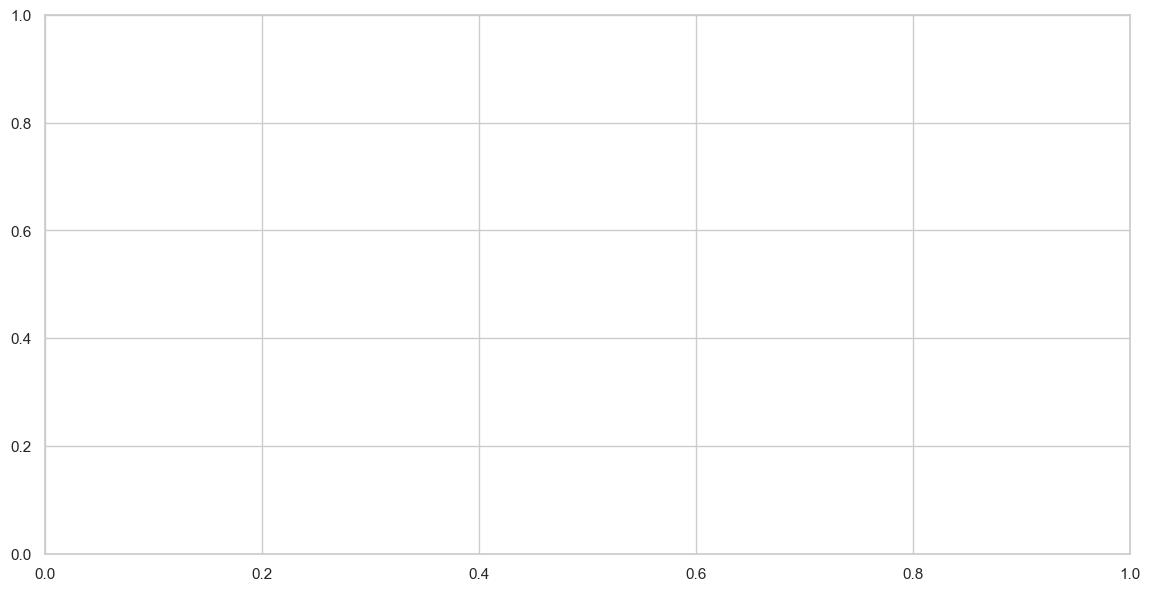

In [26]:
sns.set(style="whitegrid")

# Visualize sales by month
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='purchase_month', y='price')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Visualize quantity by month
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_quantity, x='purchase_month', y='order_item_id')
plt.title('Monthly Quantity')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()

f. Popular Products by month, seller, state, category.

In [52]:
# Popular products by month
popular_products_month = orders_items_products_sellers_payments.groupby(['purchase_month', 'product_id'])['order_item_id'].count().reset_index()
popular_products_month = popular_products_month.rename(columns={'order_item_id': 'quantity'})
popular_products_month = popular_products_month.sort_values(by=['purchase_month', 'quantity'], ascending=[True, False])

# Popular products by seller
popular_products_seller = orders_items_products_sellers_payments.groupby(['seller_id', 'product_id'])['order_item_id'].count().reset_index()
popular_products_seller = popular_products_seller.rename(columns={'order_item_id': 'quantity'})
popular_products_seller = popular_products_seller.sort_values(by=['seller_id', 'quantity'], ascending=[True, False])

# Popular products by state
popular_products_state = orders_items_products_sellers_payments.groupby(['seller_state', 'product_id'])['order_item_id'].count().reset_index()
popular_products_state = popular_products_state.rename(columns={'order_item_id': 'quantity'})
popular_products_state = popular_products_state.sort_values(by=['seller_state', 'quantity'], ascending=[True, False])

# Popular products by category
popular_products_category = orders_items_products_sellers_payments.groupby(['product_category_name', 'product_id'])['order_item_id'].count().reset_index()
popular_products_category = popular_products_category.rename(columns={'order_item_id': 'quantity'})
popular_products_category = popular_products_category.sort_values(by=['product_category_name', 'quantity'], ascending=[True, False])

print("Popular Products by Month:")
print(popular_products_month.head())

print("\nPopular Products by Seller:")
print(popular_products_seller.head())

print("\nPopular Products by State:")
print(popular_products_state.head())

print("\nPopular Products by Category:")
print(popular_products_category.head())


Popular Products by Month:
    purchase_month                        product_id  quantity
0          2016-09  5a6b04657a4c5ee34285d1e4619a96b4         3
1          2016-09  c1488892604e4ba5cff5b4eb4d595400         1
2          2016-09  f293394c72c9b5fafd7023301fc21fc2         1
3          2016-09  f3c2d01a84c947b078e32bbef0718962         1
257        2016-10  eba7488e1c67729f045ab43fac426f2e        11

Popular Products by Seller:
                           seller_id                        product_id  \
0   0015a82c2db000af6aaaf3ae2ecb0532  a2ff5a97bf95719e38ea2e3b4105bce8   
1   001cca7ae9ae17fb1caed9dfb1094831  08574b074924071f4e201e151b152b4e   
11  001cca7ae9ae17fb1caed9dfb1094831  e251ebd2858be1aa7d9b2087a6992580   
9   001cca7ae9ae17fb1caed9dfb1094831  98a8c2fa16d7239c606640f5555768e4   
2   001cca7ae9ae17fb1caed9dfb1094831  0da9ffd92214425d880de3f94e74ce39   

    quantity  
0          3  
1        115  
11        48  
9         30  
2         17  

Popular Products by State:
   

g. Popular categories by state, month

In [53]:
# Popular categories by state
popular_categories_state = orders_items_products_sellers_payments.groupby(['seller_state', 'product_category_name'])['order_item_id'].count().reset_index()
popular_categories_state = popular_categories_state.rename(columns={'order_item_id': 'quantity'})
popular_categories_state = popular_categories_state.sort_values(by=['seller_state', 'quantity'], ascending=[True, False])

# Popular categories by month
popular_categories_month = orders_items_products_sellers_payments.groupby(['purchase_month', 'product_category_name'])['order_item_id'].count().reset_index()
popular_categories_month = popular_categories_month.rename(columns={'order_item_id': 'quantity'})
popular_categories_month = popular_categories_month.sort_values(by=['purchase_month', 'quantity'], ascending=[True, False])

print("Popular Categories by State:")
print(popular_categories_state.head())

print("\nPopular Categories by Month:")
print(popular_categories_month.head())


Popular Categories by State:
      seller_state  product_category_name  quantity
42  Andhra Pradesh          Health_Beauty      7874
14  Andhra Pradesh  Computers_Accessories      6380
38  Andhra Pradesh        Furniture_Decor      5659
63  Andhra Pradesh         Sports_Leisure      5248
68  Andhra Pradesh          Watches_Gifts      4746

Popular Categories by Month:
   purchase_month product_category_name  quantity
1         2016-09         Health_Beauty         3
0         2016-09       Furniture_Decor         2
2         2016-09             Telephony         1
21        2016-10       Furniture_Decor        75
23        2016-10         Health_Beauty        50


h. List top 10 most expensive products sorted by price

In [57]:
products['total_price'] = (products['product_weight_g'] * 0.01) + \
                          (products['product_length_cm'] * products['product_height_cm'] * products['product_width_cm'] * 0.0001)
top_expensive_products = products.sort_values(by='total_price', ascending=False)

top_10_expensive_products = top_expensive_products.head(10)

print("Top 10 Most Expensive Products:")
print(top_10_expensive_products)


Top 10 Most Expensive Products:
                             product_id  product_category_name  \
25166  26644690fde745fc4654719c3904e1db         Bed_Bath_Table   
12146  f227e2d44f10f7dad30fb4dfa839e7a2  Furniture_Living_Room   
17303  3eb14e65e4208c6d94b7a32e41add538  Furniture_Living_Room   
25524  c1e0531cb1864fd3a0cae57dca55ca80  Furniture_Living_Room   
32532  90c1b4e040d1d1c45897ec2dad4a809d  Furniture_Living_Room   
7234   8d6f2c3454002d3f5aa7479a7fad7794  Furniture_Living_Room   
3770   c6fdec160d0f8f488d9041316c85051d  Furniture_Living_Room   
16728  99ff40856c47a638df807c0a144470cc  Furniture_Living_Room   
28145  0e9dfb804bafa3d68ef3ee7a621abfb2  Furniture_Living_Room   
27266  ab495f166205a883ffe5ab0b5b55f867        Home_Appliances   

       product_name_lenght  product_description_lenght  product_photos_qty  \
25166                 59.0                       534.0                 1.0   
12146                 51.0                       795.0                 1.0   
17303  

2. Performing Customers/sellers Segmentation\
     a. Divide the customers into groups based on the revenue generated

In [61]:
print(orders_items_products_sellers_payments['price'].dtype)

orders_items_products_sellers_payments['price'] = pd.to_numeric(orders_items_products_sellers_payments['price'], errors='coerce')

monetary_data = orders_items_products_sellers_payments.groupby('customer_id')['price'].sum().reset_index()
monetary_data.columns = ['customer_id', 'monetary']

quantiles = monetary_data['monetary'].quantile(q=[0.25, 0.5, 0.75])

def m_score(x, d):
    if x <= d[0.25]:
        return 1
    elif x <= d[0.50]:
        return 2
    elif x <= d[0.75]:
        return 3
    else:
        return 4

monetary_data['m_score'] = monetary_data['monetary'].apply(m_score, args=(quantiles,))

def segment_customer(m_score):
    if m_score <= 2:
        return 'Low Revenue'
    elif m_score <= 3:
        return 'Mid Revenue'
    else:
        return 'High Revenue'

monetary_data['segment'] = monetary_data['m_score'].apply(segment_customer)

print("Segmented Customers based on Revenue:")
print(monetary_data.head())


float64
Segmented Customers based on Revenue:
                        customer_id  monetary  m_score       segment
0  00012a2ce6f8dcda20d059ce98491703     89.80        3   Mid Revenue
1  000161a058600d5901f007fab4c27140     54.90        2   Low Revenue
2  0001fd6190edaaf884bcaf3d49edf079    179.99        4  High Revenue
3  0002414f95344307404f0ace7a26f1d5    149.90        3   Mid Revenue
4  000379cdec625522490c315e70c7a9fb     93.00        3   Mid Revenue


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

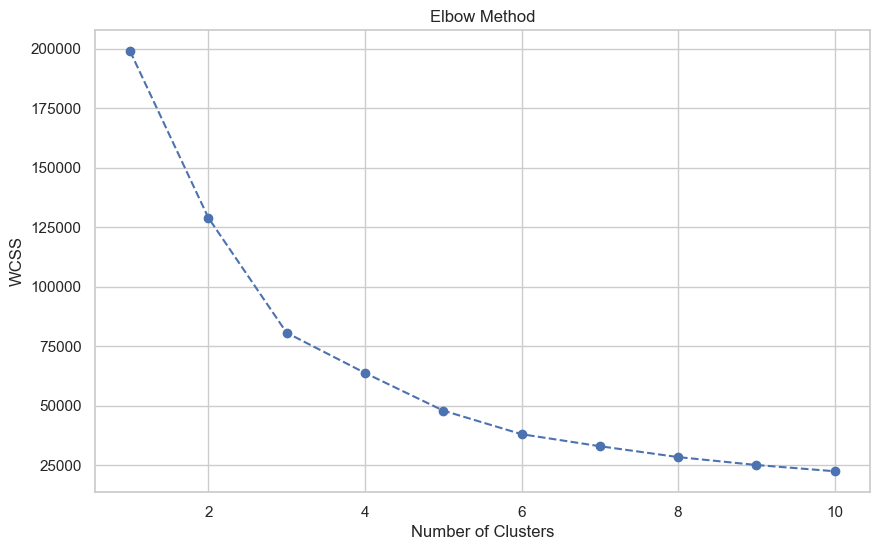

Clustered Customers:
                        customer_id  recency  frequency  monetary  cluster
0  00012a2ce6f8dcda20d059ce98491703      337          1     89.80        1
1  000161a058600d5901f007fab4c27140      458          1     54.90        1
2  0001fd6190edaaf884bcaf3d49edf079      596          1    179.99        1
3  0002414f95344307404f0ace7a26f1d5      427          1    149.90        1
4  000379cdec625522490c315e70c7a9fb      198          1     93.00        0


In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = rfm_data[['recency', 'frequency', 'monetary']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled)

rfm_data['cluster'] = kmeans.labels_

print("Clustered Customers:")
print(rfm_data.head())


b. Divide the sellers into groups based on the revenue generated

In [64]:
seller_revenue = orders_items_products_sellers_payments.groupby('seller_id')['price'].sum().reset_index()
seller_revenue.columns = ['seller_id', 'revenue']

quantiles = seller_revenue['revenue'].quantile(q=[0.25, 0.5, 0.75])

def revenue_score(x, d):
    if x <= d[0.25]:
        return 1
    elif x <= d[0.50]:
        return 2
    elif x <= d[0.75]:
        return 3
    else:
        return 4

seller_revenue['revenue_score'] = seller_revenue['revenue'].apply(revenue_score, args=(quantiles,))

def segment_seller(revenue_score):
    if revenue_score <= 2:
        return 'Low Revenue'
    elif revenue_score == 3:
        return 'Mid Revenue'
    else:
        return 'High Revenue'

seller_revenue['segment'] = seller_revenue['revenue_score'].apply(segment_seller)

print("Segmented Sellers based on Revenue:")
print(seller_revenue.head())


Segmented Sellers based on Revenue:
                          seller_id   revenue  revenue_score       segment
0  0015a82c2db000af6aaaf3ae2ecb0532   2685.00              3   Mid Revenue
1  001cca7ae9ae17fb1caed9dfb1094831  25248.93              4  High Revenue
2  001e6ad469a905060d959994f1b41e4f    250.00              2   Low Revenue
3  002100f778ceb8431b7a1020ff7ab48f   1283.20              3   Mid Revenue
4  003554e2dce176b5555353e4f3555ac8    120.00              1   Low Revenue


3. Cross-Selling (Which products are selling together)\
Hint: We need to find which of the top 10 combinations of products are selling together in 
each transaction. (combination of 2 or 3 buying together)

In [68]:
from itertools import combinations
from collections import Counter

combination_counts = Counter()

for transaction_id, group in orders_items_products_sellers_payments.groupby('order_id'):
    products_in_transaction = group['product_id'].tolist()
    for i in range(2, 4):
        for combination in combinations(products_in_transaction, i):
            combination_counts[combination] += 1

top_10_combinations = combination_counts.most_common(10)

print("Top 10 Combinations of Products Selling Together:")
for combination, count in top_10_combinations:
    print(f"Combination: {combination}, Count: {count}")


Top 10 Combinations of Products Selling Together:
Combination: ('ebf9bc6cd600eadd681384e3116fda85', 'ebf9bc6cd600eadd681384e3116fda85', '5ddab10d5e0a23acb99acf56b62b3276'), Count: 18081
Combination: ('ebf9bc6cd600eadd681384e3116fda85', 'ebf9bc6cd600eadd681384e3116fda85', 'ebf9bc6cd600eadd681384e3116fda85'), Count: 11480
Combination: ('ebf9bc6cd600eadd681384e3116fda85', '5ddab10d5e0a23acb99acf56b62b3276', '5ddab10d5e0a23acb99acf56b62b3276'), Count: 8820
Combination: ('0554911df28fda9fd668ce5ba5949695', '0554911df28fda9fd668ce5ba5949695', '0554911df28fda9fd668ce5ba5949695'), Count: 8436
Combination: ('1aecdb5fa3add74e385f25c6c527a462', '1aecdb5fa3add74e385f25c6c527a462', '1aecdb5fa3add74e385f25c6c527a462'), Count: 3654
Combination: ('8d37ee446981d3790967d0268d6cfc81', '8d37ee446981d3790967d0268d6cfc81', '8d37ee446981d3790967d0268d6cfc81'), Count: 2600
Combination: ('11250b0d4b709fee92441c5f34122aed', '11250b0d4b709fee92441c5f34122aed', '11250b0d4b709fee92441c5f34122aed'), Count: 2024
Com

4. Payment Behaviour\
     a. How customers are paying?

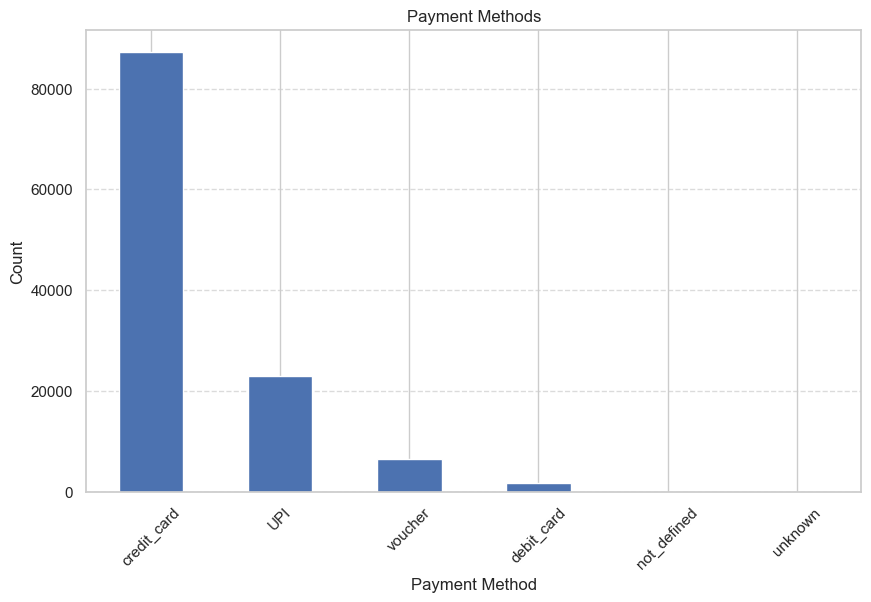

In [69]:
payment_counts = orders_items_products_sellers_payments['payment_type'].value_counts()

plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar')
plt.title('Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


b. Which payment channels are used by most customers?

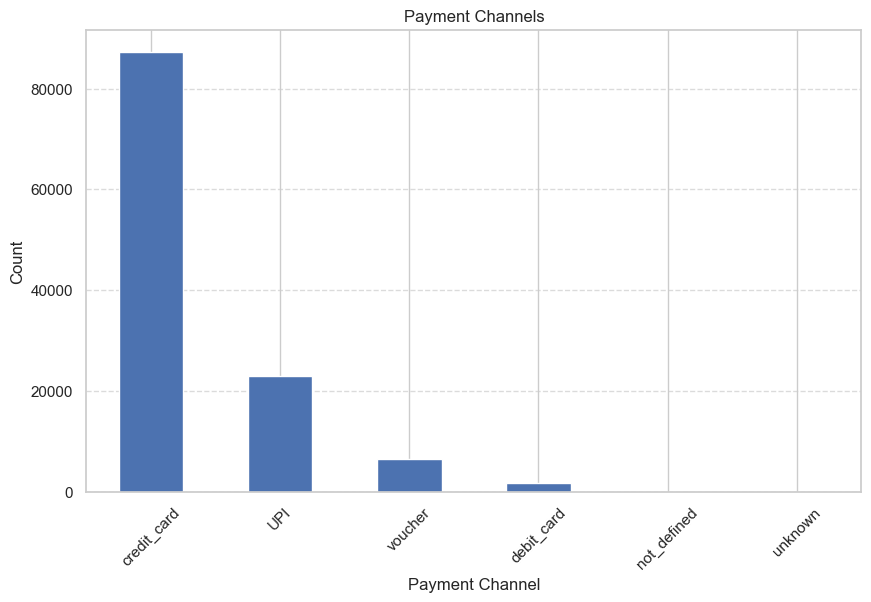

In [73]:
channel_counts = orders_items_products_sellers_payments['payment_type'].value_counts()

plt.figure(figsize=(10, 6))
channel_counts.plot(kind='bar')
plt.title('Payment Channels')
plt.xlabel('Payment Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [75]:
order_reviews

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29


5. Customer satisfaction towards category & product\
     a. Which categories (top 10) are maximum rated & minimum rated?

In [ ]:
orders_items_products_sellers_payments = pd.merge(
    orders_items_products_sellers_payments,
    order_reviews[['order_id', 'review_score']],
    on='order_id',
    how='left'
)
print(orders_items_products_sellers_payments.columns)

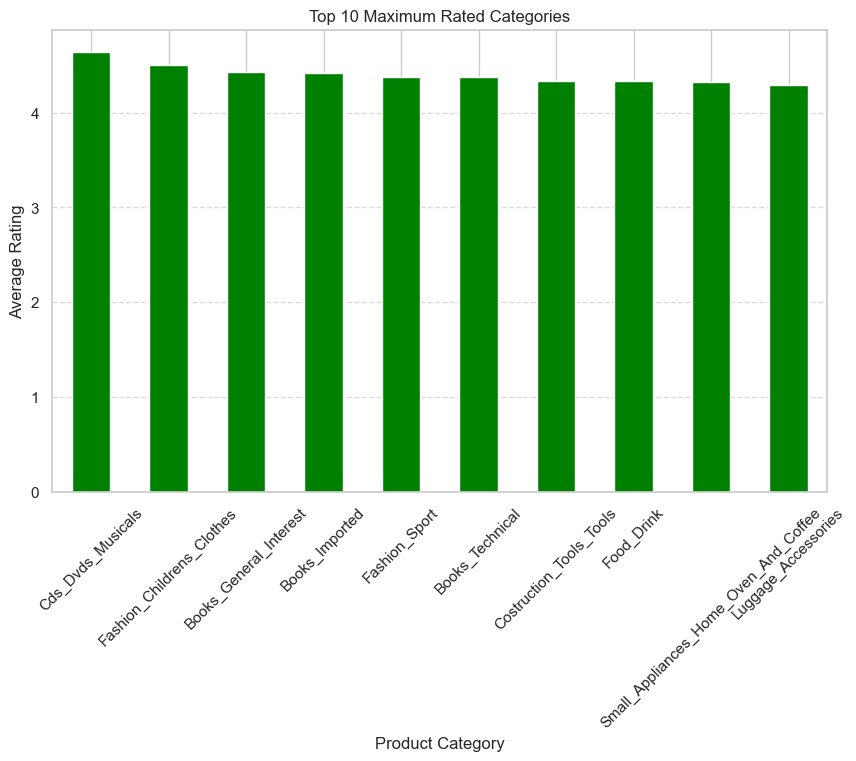

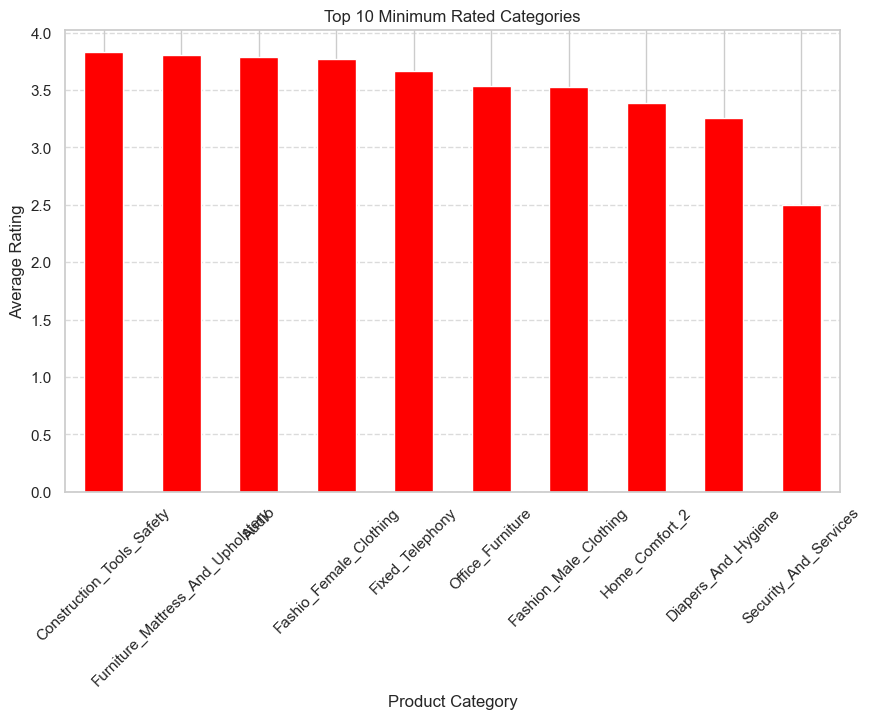

In [89]:
filtered_data = orders_items_products_sellers_payments[['product_category_name', 'review_score']].dropna()
category_avg_ratings = filtered_data.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_avg_ratings.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Maximum Rated Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
category_avg_ratings.tail(10).plot(kind='bar', color='red')
plt.title('Top 10 Minimum Rated Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


b. Which products (top10) are maximum rated & minimum rated?

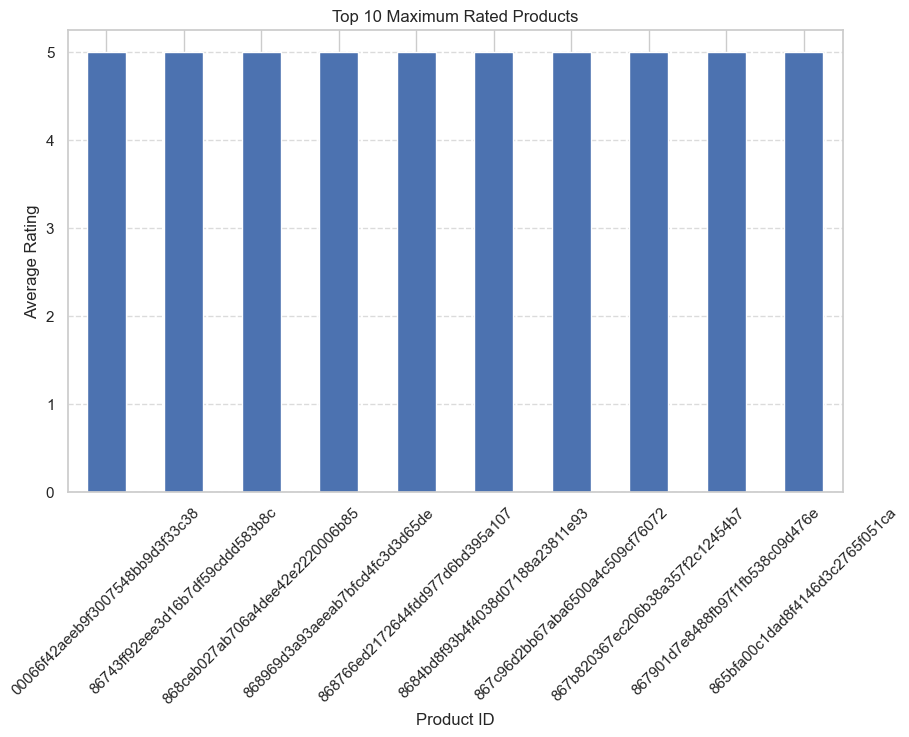

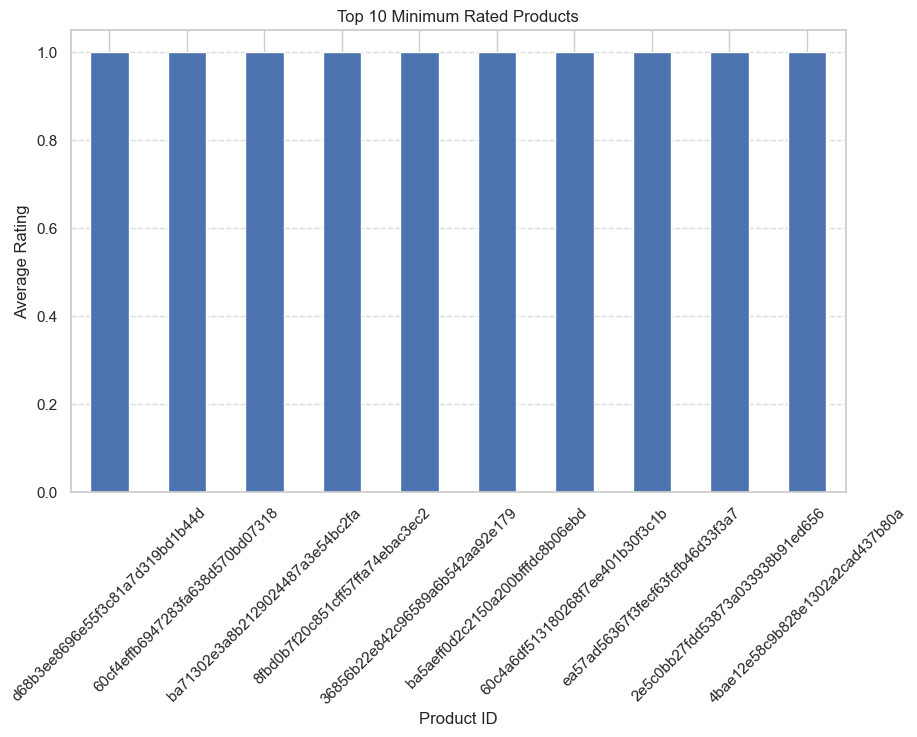

In [91]:
product_avg_ratings = orders_items_products_sellers_payments.groupby('product_id')['review_score'].mean().sort_values(ascending=False)

# Plot the top 10 maximum rated products
plt.figure(figsize=(10, 6))
product_avg_ratings.head(10).plot(kind='bar')
plt.title('Top 10 Maximum Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the top 10 minimum rated products
plt.figure(figsize=(10, 6))
product_avg_ratings.tail(10).plot(kind='bar')
plt.title('Top 10 Minimum Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


c. Average rating by location, seller, product, category, month etc.
Etc.

In [103]:
# Average rating by location
location_avg_rating = orders_items_products_sellers_payments.groupby('customer_city')['review_score'].mean()

# Average rating by seller
seller_avg_rating = orders_items_products_sellers_payments.groupby('seller_id')['review_score'].mean()

# Average rating by product
product_avg_rating = orders_items_products_sellers_payments.groupby('product_id')['review_score'].mean()

# Average rating by category
category_avg_rating = orders_items_products_sellers_payments.groupby('product_category_name')['review_score'].mean()

# Average rating by month
orders_items_products_sellers_payments['order_purchase_month'] = orders_items_products_sellers_payments['order_purchase_timestamp'].dt.to_period('M')
month_avg_rating = orders_items_products_sellers_payments.groupby('order_purchase_month')['review_score'].mean()


In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

location_avg_rating.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Average Rating by Location')
axes[0, 0].set_xlabel('Location')
axes[0, 0].set_ylabel('Average Rating')

# Average rating by seller
seller_avg_rating.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Average Rating by Seller')
axes[0, 1].set_xlabel('Seller')
axes[0, 1].set_ylabel('Average Rating')

# Average rating by product
product_avg_rating.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Average Rating by Product')
axes[1, 0].set_xlabel('Product')
axes[1, 0].set_ylabel('Average Rating')

# Average rating by category
category_avg_rating.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Average Rating by Category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Average Rating')

# Average rating by month
month_avg_rating.plot(kind='line', ax=axes[2, 0])
axes[2, 0].set_title('Average Rating by Month')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Average Rating')

# Adjust layout
plt.tight_layout()
plt.show()